# Introduction to scikit-learn

scikit-learn is a popular Python library for machine learning, providing tools for classification, regression, clustering, dimensionality reduction, and more. In this notebook, you will learn to load datasets, perform supervised and unsupervised learning, and explore self-supervised learning.

---

## Part 1: Loading and Visualizing Datasets

In this part, you'll learn how to load and visualize datasets using scikit-learn.

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [43]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.tree import plot_tree
from sklearn.inspection import DecisionBoundaryDisplay


from sklearn.metrics import accuracy_score, classification_report


from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np

### Exercise 1: Load the Iris dataset

- Load the Iris dataset using `datasets.load_iris()`.
- Visualize the first two features using a scatter plot (`plt.scatter()`), with each species represented by a different color.

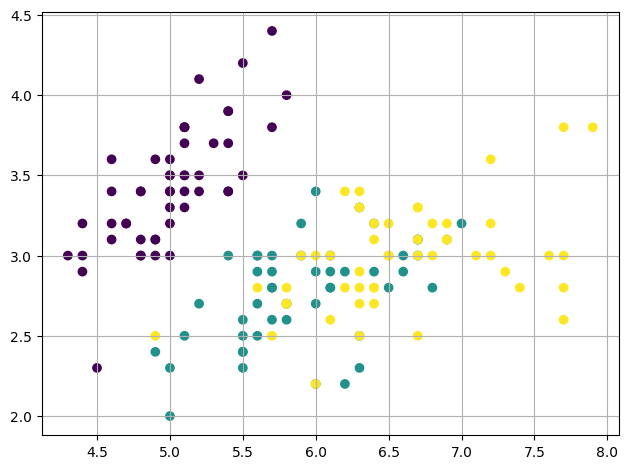

In [44]:
whole_dataset = datasets.load_iris()
X = whole_dataset.data
y = whole_dataset.target

fig, ax = plt.subplots()
ax.scatter(X[:, 0],X[:, 1], c=y)

ax.grid(True)
fig.tight_layout()

### Exercise 2: Load the Wine dataset

* Load the Wine dataset using `datasets.load_wine()`.
* Create a 2D scatter plot of the first two features of the dataset, using different colors for the three wine classes.

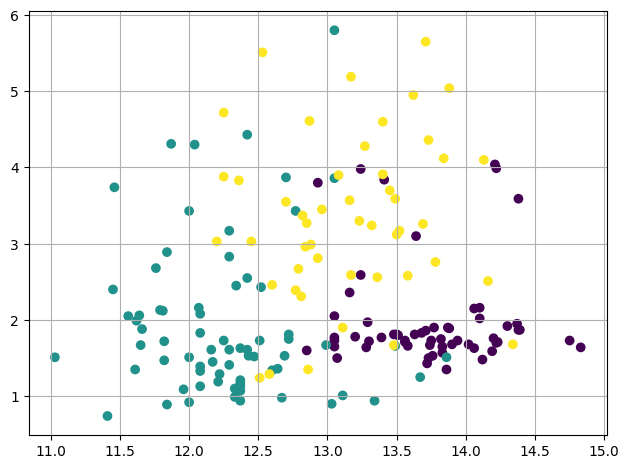

In [45]:
whole_dataset = datasets.load_wine()
X = whole_dataset.data
y = whole_dataset.target

fig, ax = plt.subplots()
ax.scatter(X[:, 0],X[:, 1], c=y)

ax.grid(True)
fig.tight_layout()

## Part 2: Supervised Learning

In this part, you'll perform classification and regression using scikit-learn models.

Classification: Decision Tree and Logistic Regression

### Exercise 3: Classification with Decision Tree

* Load the Iris dataset.
* Train a Decision Tree classifier (`DecisionTreeClassifier()`) on the dataset.
* Visualize the decision boundary using a scatter plot.

Accuracy: 0.78


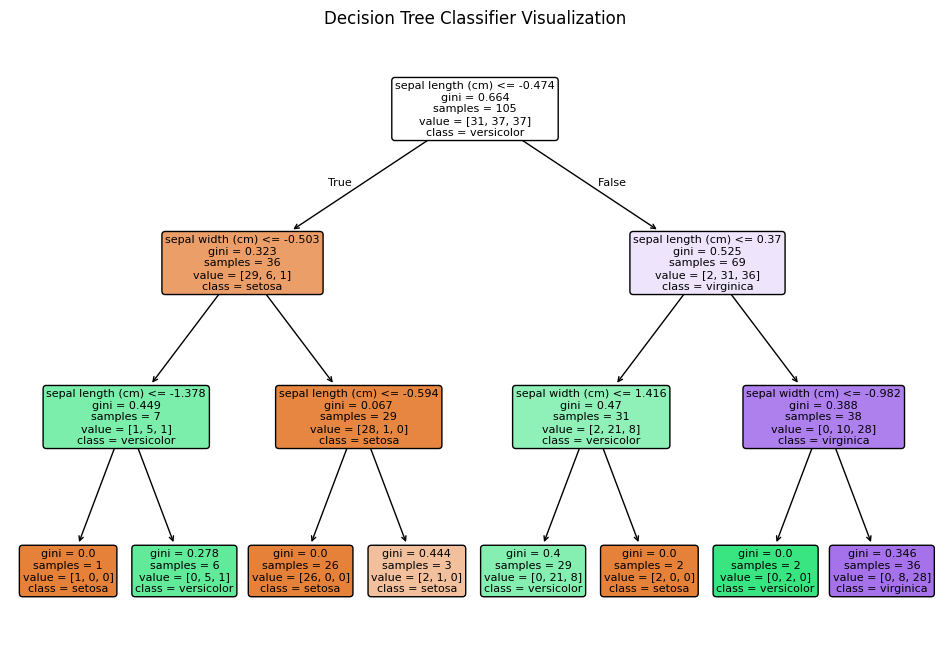

<Figure size 800x600 with 0 Axes>

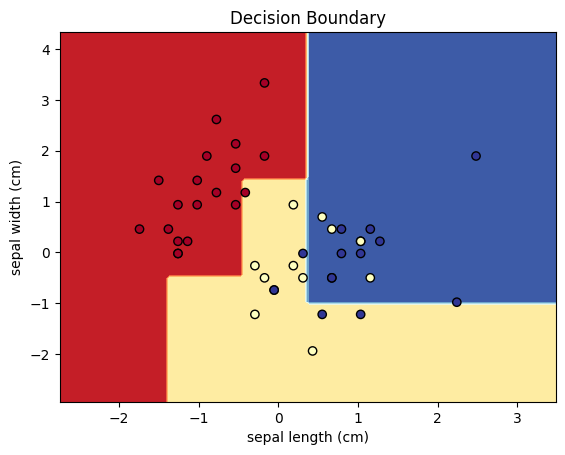

In [46]:
# (Write your code below)
#sources = https://scikit-learn.org/1.5/auto_examples/tree/plot_iris_dtc.html
whole_dataset = datasets.load_iris()
X = whole_dataset.data[:, :2]
y = whole_dataset.target

# Splitting datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

#print Show accuracy
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf, 
    filled=True, 
    feature_names=whole_dataset.feature_names[:2], 
    class_names=whole_dataset.target_names, 
    rounded=True, 
    fontsize=8
)
plt.title("Decision Tree Classifier Visualization")
plt.show()

# Plot the decision boundary
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel=whole_dataset.feature_names[0],
    ylabel=whole_dataset.feature_names[1],
)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k", cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary")
plt.show()


### Exercise 4: Classification with Logistic Regression

* Load the Wine dataset.
* Train a Logistic Regression model (`LogisticRegression()`) on the dataset.
* Plot the decision boundary and visualize the predictions.

Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.89      0.76      0.82        21
           2       0.62      0.57      0.59        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.75      0.74      0.74        54



<Figure size 800x600 with 0 Axes>

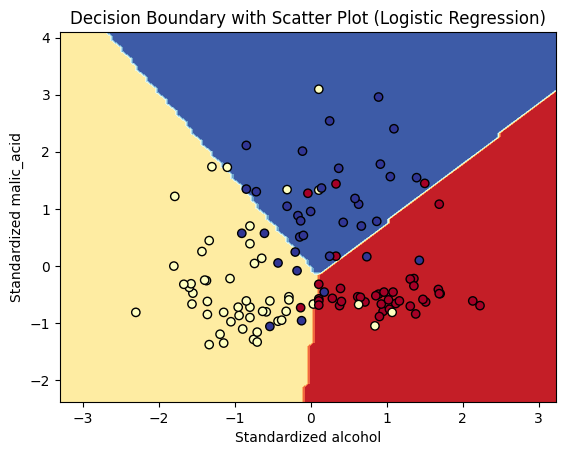

In [68]:
# Load dataset
whole_dataset = datasets.load_wine()
X = whole_dataset.data
y = whole_dataset.target

## Select two features for visualization
X_selected = X[:, :2]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate the classification model
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the decision boundary
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    logistic_model,
    X_train,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    xlabel=whole_dataset.feature_names[0],
    ylabel=whole_dataset.feature_names[1],
)

# Scatter plot of the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary with Scatter Plot (Logistic Regression)")
plt.xlabel("Standardized " + whole_dataset.feature_names[0])
plt.ylabel("Standardized " + whole_dataset.feature_names[1])
plt.show()

### Exercise 5: Linear Regression on the California Housing dataset

- Load the California Housing dataset using `datasets.fetch_california_housing()`.
- Train a Linear Regression model (`LinearRegression()`) to predict house prices.
- Plot the predicted values vs. the true values using `plt.scatter()`.

Mean Squared Error: 0.53
R² Score: 0.60


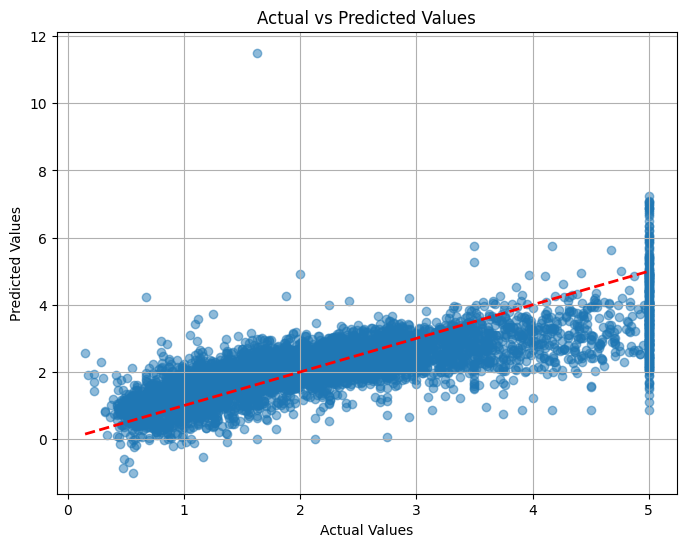

In [72]:
# Load dataset
whole_dataset = datasets.fetch_california_housing()
X = whole_dataset.data
y = whole_dataset.target

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the regression model
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


## Part 3: Unsupervised Learning (PCA)

Principal Component Analysis (PCA) is used to reduce the dimensionality of data.

### Exercise 6: PCA on the Iris dataset

* Load the Iris dataset.
* Apply PCA (`PCA()`) to reduce the dataset to 2 components.
* Plot the two principal components, coloring the points by species.

In [49]:
# (Write your code below)

## Part 4: Self-Supervised Learning (Regression)

In self-supervised learning, the target is extracted directly from the data rather than being provided externally. In this exercise, you'll create a synthetic dataset and extract a target signal from the data itself. You'll then train a regression model to predict this target signal.

### Exercise 7: Self-Supervised Learning with Regression

- Create a synthetic dataset with `datasets.make_regression()` that contains multiple features.
- Use one feature (e.g., the first feature) as the target signal (`y`), and use the other features as inputs (`X`).
- Train a regression model (`LinearRegression()`) to predict the target signal.
- Plot the predicted vs. actual values for the target signal using `plt.scatter()`.

```python
# (Write your code below)
